In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/train_data_20221117.csv', index_col = 0)

In [3]:
df

,Pclass,SibSp,Parch,Age_true,AgeGroup,FareGroup,CabinLvl,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Mr,Title_Mrs,Title_Ms,Title_Noble,Survived
445,1,0,2,1,0,4,7,0,0,1,1,0,0,0,0,1
650,3,0,0,0,3,1,0,0,0,1,0,1,0,0,0,0
172,3,1,1,1,0,2,0,0,0,1,0,0,0,1,0,1
450,2,1,2,1,4,3,0,0,0,1,0,1,0,0,0,0
314,2,1,1,1,4,3,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,0,0,1,2,0,0,0,0,1,0,0,0,1,0,1
270,1,0,0,0,3,3,0,0,0,1,0,1,0,0,0,0
860,3,2,0,1,4,2,0,0,0,1,0,1,0,0,0,0
435,1,1,2,1,1,5,6,0,0,1,0,0,0,1,0,1


In [4]:
X, y = df.iloc[:, 1:], df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [5]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

parameters = {
    'C': [1e-3,1e-2,0.1,1], 'gamma': ['scale','auto'],'kernel': ['rbf', 'poly']
}

clf = SVC()
stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search_estimator = GridSearchCV(clf, parameters, scoring='f1', cv=stratified_10_fold_cv, return_train_score=False,
                                    verbose = 2)
grid_search_estimator.fit(X_train,y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.001, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..................C=0.001, gamma=scal

[CV] END .....................C=0.1, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly']},
             scoring='f1', verbose=2)

In [6]:
results = pd.DataFrame(grid_search_estimator.cv_results_)
print("best score is {} with params {}".format(grid_search_estimator.best_score_, grid_search_estimator.best_params_))
display(results)
estimator = grid_search_estimator.best_estimator_

best score is 0.9971428571428571 with params {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010856,0.005355,0.002739,0.001316,0.001,scale,rbf,"{'C': 0.001, 'gamma': 'scale', 'kernel': 'rbf'}",0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12
1,0.005943,0.000149,0.001439,0.000105,0.001,scale,poly,"{'C': 0.001, 'gamma': 'scale', 'kernel': 'poly'}",0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12
2,0.008062,0.000155,0.002053,0.000036,0.001,auto,rbf,"{'C': 0.001, 'gamma': 'auto', 'kernel': 'rbf'}",0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12
3,0.005810,0.000043,0.001377,0.000024,0.001,auto,poly,"{'C': 0.001, 'gamma': 'auto', 'kernel': 'poly'}",0.272727,0.300000,...,0.285714,0.454545,0.363636,0.210526,0.320000,0.272727,0.272727,0.296313,0.068297,11
4,0.008381,0.000176,0.002183,0.000130,0.01,scale,rbf,"{'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}",0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12
5,0.005487,0.000068,0.001334,0.000022,0.01,scale,poly,"{'C': 0.01, 'gamma': 'scale', 'kernel': 'poly'}",0.272727,0.454545,...,0.363636,0.521739,0.380952,0.380952,0.400000,0.260870,0.272727,0.382989,0.091392,10
6,0.008316,0.000265,0.002159,0.000177,0.01,auto,rbf,"{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}",0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12
7,0.005274,0.000049,0.001309,0.000013,0.01,auto,poly,"{'C': 0.01, 'gamma': 'auto', 'kernel': 'poly'}",0.521739,0.583333,...,0.521739,0.521739,0.380952,0.400000,0.454545,0.363636,0.285714,0.455514,0.089329,9
8,0.008071,0.000391,0.002071,0.000154,0.1,scale,rbf,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}",0.750000,0.875000,...,0.857143,0.800000,0.914286,0.875000,0.833333,0.764706,0.756757,0.820042,0.055635,7
9,0.005195,0.000099,0.001314,0.000086,0.1,scale,poly,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}",0.827586,0.827586,...,0.740741,0.785714,0.692308,0.608696,0.692308,0.640000,0.583333,0.709058,0.081528,8


acc=1.0


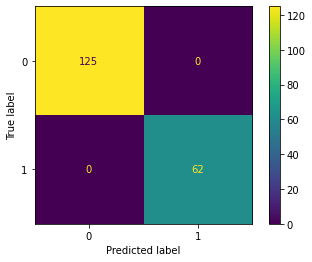

In [7]:
predictions = estimator.predict(X_test)

cm = confusion_matrix(y_test, predictions)
acc = accuracy_score(y_test, predictions)
print(f'{acc=}')
ConfusionMatrixDisplay(cm).plot()

In [8]:
for feature in X_test.columns:
    print(feature)
    for value in X_test[feature].unique():
        indices = X_test[feature] == value
        true_feature = y_test[indices]
        pred_feature = predictions[indices]
        print(' -', value, ': true = ', sum(true_feature), '\tpred = ', sum(pred_feature))

SibSp
 - 1 : true =  19 	pred =  19
 - 0 : true =  40 	pred =  40
 - 2 : true =  3 	pred =  3
 - 5 : true =  0 	pred =  0
 - 4 : true =  0 	pred =  0
 - 8 : true =  0 	pred =  0
 - 3 : true =  0 	pred =  0
Parch
 - 0 : true =  44 	pred =  44
 - 1 : true =  13 	pred =  13
 - 2 : true =  4 	pred =  4
 - 6 : true =  0 	pred =  0
 - 3 : true =  1 	pred =  1
Age_true
 - 1 : true =  54 	pred =  54
 - 0 : true =  8 	pred =  8
AgeGroup
 - 2 : true =  15 	pred =  15
 - 4 : true =  14 	pred =  14
 - 3 : true =  14 	pred =  14
 - 0 : true =  7 	pred =  7
 - 5 : true =  8 	pred =  8
 - 1 : true =  4 	pred =  4
FareGroup
 - 2 : true =  13 	pred =  13
 - 3 : true =  11 	pred =  11
 - 4 : true =  16 	pred =  16
 - 1 : true =  6 	pred =  6
 - 0 : true =  9 	pred =  9
 - 5 : true =  7 	pred =  7
CabinLvl
 - 0 : true =  37 	pred =  37
 - 2 : true =  2 	pred =  2
 - 4 : true =  7 	pred =  7
 - 3 : true =  3 	pred =  3
 - 6 : true =  7 	pred =  7
 - 5 : true =  6 	pred =  6
 - 7 : true =  0 	pred =  0
 - 